In [4]:
"""
author - Wang Peiyu
data set acknowledgement: 
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages. DOI=http://dx.doi.org/10.1145/2827872
Paper acknowledgement:
Khan, Z.A., Chaudhary, N.I. & Zubair, S. Electron Markets (2018). https://doi.org/10.1007/s12525-018-0297-2
"""
import pandas as pd
data=pd.read_csv("u.data", sep="\t", header=None)
data.columns=['user_id','item_id','rating','timestamp']
print(data)
print(data.dtypes)

       user_id  item_id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
5          298      474       4  884182806
6          115      265       2  881171488
7          253      465       5  891628467
8          305      451       3  886324817
9            6       86       3  883603013
10          62      257       2  879372434
11         286     1014       5  879781125
12         200      222       5  876042340
13         210       40       3  891035994
14         224       29       3  888104457
15         303      785       3  879485318
16         122      387       5  879270459
17         194      274       2  879539794
18         291     1042       4  874834944
19         234     1184       2  892079237
20         119      392       4  886176814
21         167      486       4  892738452
22         

In [5]:
#dataset preprocessing-creating a new dataframe in the format of x users * n items
user_id_list=data['user_id'].unique().tolist()
#print(len(user_id_list))
item_id_list=data['item_id'].unique().tolist()
#print(len(item_id_list))
already_checked_index=[]
user_item=pd.DataFrame()
#print(min(user_id_list))
#print(min(item_id_list))
for item in item_id_list:
    #print(item)
    user_list=[]
    rating_list=[]
    for i in range(100000):
        #print(data.iloc[i,0]==user)
        if data.iloc[i,1]==item:
            user_list.append(data.iloc[i,0])
            rating_list.append(data.iloc[i,2])
            #already_checked_index.append(i)
    #print(np.unique(rating_list))
    ratings=np.zeros(943)
    for j in range(len(user_list)):
        index=user_list[j]-1
        ratings[index]=rating_list[j]
    #print(ratings)
    user_item[str(item)]=ratings
print(user_item)

     242  302  377   51  346  474  265  465  451   86  ...  1594  1626  1645  \
0    5.0  0.0  0.0  4.0  0.0  0.0  4.0  0.0  0.0  5.0  ...   0.0   0.0   0.0   
1    5.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
2    0.0  2.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
3    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
4    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   0.0   0.0   0.0   
5    4.0  4.0  0.0  0.0  0.0  5.0  0.0  1.0  0.0  3.0  ...   0.0   0.0   0.0   
6    0.0  0.0  0.0  2.0  0.0  5.0  5.0  4.0  5.0  4.0  ...   0.0   0.0   0.0   
7    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
8    4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
9    0.0  4.0  0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
10   0.0  0.0  0.0  4.0  0.0  0.0  0.0  0.0  2.0  4.0  ...   0.0   0.0   0.0   
11   5.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [6]:
#define the rmse function for calculating root mean squared error
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten() 
    #print(prediction)
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return np.sqrt(((prediction-ground_truth)**2).mean(axis=None)) #((A - B)**2).mean(axis=ax)


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
def SGD(z,learning_rate,feature,epochs):#almost all computations in np is O(n)
    """
    z is a training matrix that has the shape of m*n, m is the number of users and n is the number of items
    learning_rate,
    epochs= # of iterations
    print the cost history over for each iterations
    """
    m=z.shape[0]
    n=z.shape[1]
    z_train=z[:800]#partition Z into two sets
    z_test=z[800:]#training and testing sets
    cost_history=np.zeros(epochs)
    val_errors=[]
    x=5 * np.random.rand(feature,m)#initialize X randomly
    y=5 * np.random.rand(feature,n)#initialize Y randomly
    z_train_array=np.asarray(z_train)
    users,items = np.nonzero(z_train_array)
    print(zip(users,items))
    for epoch in range(epochs):
        error_list=[]
        for u, i in zip(users,items):
            e = z_train.iloc[u, i] - np.dot(x[:,u].T,y[:,i])  # Calculate error for gradient update
            error_list.append(e)
            x[:,u] = x[:,u].astype(float)+learning_rate * ( e * y[:,i] ) # Update latent user feature matrix
            y[:,i] = y[:,i].astype(float)+learning_rate * ( e * x[:,u] )
        #RMSE=np.sqrt(np.mean(np.sum(np.square(error_list))))
        train_RMSE=rmse(np.dot(x.T,y),z_train_array)
        test_RMSE = rmse(np.dot(x.T,y),np.asarray(z_test))
        val_errors.append(test_RMSE)
        cost_history[epoch]=train_RMSE# Update latent item feature matrix
    print(cost_history)
    plt.plot(range(epochs), cost_history, marker='o', label='Training Data');
    plt.plot(range(epochs), val_errors, marker='v', label='Validation Data');
    plt.xlabel('Number of Epochs');
    plt.ylabel('RMSE');
    plt.legend()
    plt.grid()
    plt.show()


        #Time Complexity: hard to say because matrix multiplication is a major concern in this algorithm and the time complexity of different matrix multiplication varies

k=10, epochs =40 : 
[6.07795453 4.51017803 3.80343802 3.38755838 3.10597545 2.89610838
 2.72774528 2.58463366 2.4575868  2.34144961 2.23353005 2.13263166
 2.03837648 1.95072878 1.86969778 1.79519323 1.72698884 1.66474411
 1.60804602 1.55644909 1.50950536 1.46678343 1.42787887 1.39241889
 1.36006333 1.33050386 1.30346206 1.27868727 1.25595422 1.23506078
 1.21582581 1.1980871  1.18169956 1.16653346 1.15247284 1.13941408
 1.12726459 1.11594158 1.10537099 1.09548655]


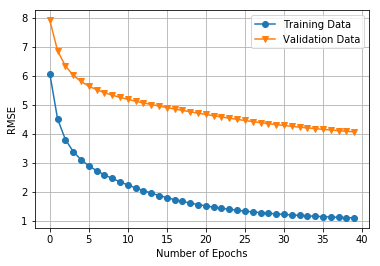

k=10, epochs =80 : 
[6.0891417  4.50935679 3.80307475 3.38997505 3.11211568 2.90664927
 2.74328125 2.60559428 2.48406825 2.3730804  2.26945489 2.17163766
 2.07911549 1.99194608 1.91038833 1.83465684 1.76480484 1.70070633
 1.64209278 1.58860604 1.53984562 1.49540245 1.45487976 1.41790427
 1.38413116 1.35324542 1.32496127 1.29902069 1.27519142 1.25326495
 1.23305444 1.21439271 1.19713038 1.18113403 1.1662846  1.15247582
 1.1396128  1.12761082 1.11639411 1.10589486 1.0960523  1.08681188
 1.07812456 1.06994618 1.0622369  1.05496071 1.048085   1.04158019
 1.0354194  1.02957815 1.02403412 1.01876692 1.01375789 1.00898993
 1.00444733 1.00011567 0.99598166 0.99203304 0.98825851 0.98464761
 0.98119065 0.97787868 0.97470337 0.97165699 0.96873234 0.96592275
 0.96322197 0.96062419 0.95812397 0.95571624 0.95339625 0.95115955
 0.94900197 0.9469196  0.94490878 0.94296605 0.94108818 0.93927211
 0.93751497 0.93581405]


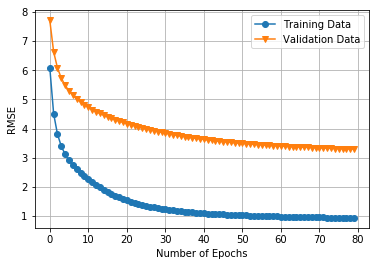

k=10, epochs =120 : 
[6.07723438 4.51049378 3.80555777 3.39079777 3.11024523 2.901956
 2.73611628 2.59652016 2.47368143 2.36190174 2.25787257 2.15989409
 2.0673315  1.98016873 1.89864102 1.82297225 1.75323348 1.68930677
 1.63091545 1.57768037 1.52917459 1.48496444 1.44463491 1.40780264
 1.37412059 1.34327783 1.31499692 1.28903043 1.26515729 1.24317956
 1.22291954 1.20421735 1.18692898 1.17092454 1.15608689 1.14231033
 1.12949956 1.11756865 1.10644016 1.0960443  1.08631822 1.07720526
 1.06865438 1.06061953 1.05305916 1.04593574 1.03921532 1.03286718
 1.02686343 1.02117879 1.01579023 1.01067682 1.00581942 1.00120057
 0.9968043  0.99261593 0.98862204 0.98481025 0.98116917 0.97768832
 0.97435799 0.97116923 0.96811373 0.96518381 0.96237233 0.95967265
 0.95707861 0.95458446 0.95218483 0.94987474 0.94764951 0.94550477
 0.94343643 0.94144066 0.93951388 0.9376527  0.93585397 0.93411472
 0.93243213 0.93080357 0.92922657 0.92769878 0.92621799 0.92478211
 0.92338918 0.92203734 0.92072481 0.9194499

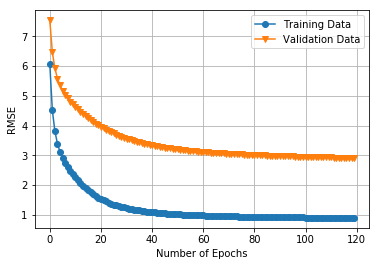

k=10, epochs =160 : 
[6.14103722 4.49200541 3.7683941  3.34964401 3.06924775 2.8620031
 2.69700386 2.55781439 2.43513008 2.32360621 2.22028233 2.12367088
 2.03315243 1.94854853 1.8698326  1.79696084 1.72979899 1.66811286
 1.61159133 1.55987851 1.51260234 1.46939483 1.42990415 1.39380065
 1.36077885 1.33055745 1.3028782  1.27750464 1.25422062 1.23282902
 1.2131505  1.1950223  1.17829714 1.16284201 1.14853712 1.13527474
 1.12295814 1.11150059 1.1008243  1.09085959 1.08154398 1.07282143
 1.06464164 1.05695941 1.04973406 1.04292893 1.03651096 1.03045023
 1.02471968 1.01929476 1.01415316 1.00927457 1.0046405  1.00023404
 0.99603975 0.99204347 0.98823222 0.98459407 0.98111805 0.97779406
 0.97461275 0.97156553 0.96864442 0.96584205 0.96315158 0.96056665
 0.95808137 0.95569024 0.95338817 0.95117038 0.94903243 0.94697016
 0.9449797  0.94305741 0.94119989 0.93940395 0.9376666  0.93598503
 0.93435659 0.93277881 0.93124934 0.92976598 0.92832666 0.92692941
 0.9255724  0.92425387 0.92297216 0.921725

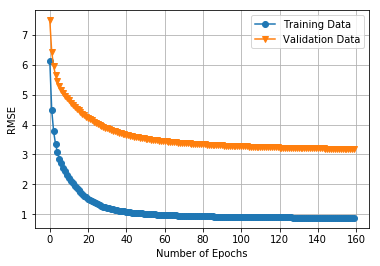

k=10, epochs =200 : 
[6.07045176 4.49214315 3.78641618 3.37439588 3.09739751 2.89278285
 2.73065942 2.59494314 2.47629967 2.36910949 2.27001072 2.1771107
 2.08948698 2.00681835 1.92909307 1.85639108 1.78874695 1.72608945
 1.66823797 1.61493013 1.56585793 1.52069919 1.47913891 1.44088102
 1.40565281 1.37320504 1.34330986 1.31575814 1.29035691 1.26692742
 1.24530366 1.22533148 1.20686795 1.18978096 1.17394885 1.15926005
 1.14561264 1.13291389 1.1210797  1.11003396 1.099708   1.09003986
 1.08097378 1.07245949 1.06445176 1.05690978 1.04979676 1.04307948
 1.03672788 1.03071473 1.02501534 1.01960727 1.01447009 1.00958515
 1.00493545 1.0005054  0.99628072 0.99224831 0.9883961  0.984713
 0.98118876 0.97781392 0.97457973 0.97147807 0.96850143 0.96564281
 0.96289573 0.96025414 0.9577124  0.95526526 0.9529078  0.95063543
 0.94844386 0.94632905 0.94428725 0.94231489 0.94040866 0.93856543
 0.93678225 0.93505635 0.93338512 0.93176611 0.93019697 0.92867553
 0.92719969 0.92576751 0.92437713 0.92302678

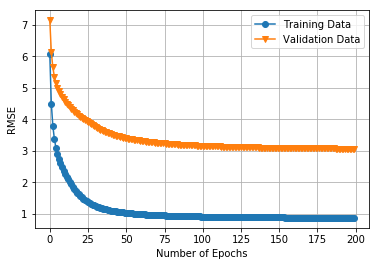

In [10]:
print("k=10, epochs =40 : ")
SGD(user_item,0.001,10,40)#0.05638
print("k=10, epochs =80 : ")
SGD(user_item,0.001,10,80)#0.0537
print("k=10, epochs =120 : ")
SGD(user_item,0.001,10,120)#0.8221
print("k=10, epochs =160 : ")
SGD(user_item,0.001,10,160)#0.6709
print("k=10, epochs =200 : ")
SGD(user_item,0.001,10,200)#0.5819

k=20, epochs =40 : 
[7.89869464 5.55041597 4.55816387 3.99940487 3.62974641 3.35366134
 3.12571998 2.92276812 2.73422075 2.55723285 2.39287546 2.24302932
 2.10867064 1.98954413 1.88454054 1.79216402 1.71084925 1.63912394
 1.5756735  1.51935518 1.4691892  1.4243411  1.38410208 1.34787026
 1.31513395 1.2854573  1.25846814 1.23384778 1.21132251 1.19065647
 1.1716458  1.15411371 1.13790633 1.12288939 1.10894526 1.09597059
 1.08387432 1.07257593 1.06200404 1.05209518]


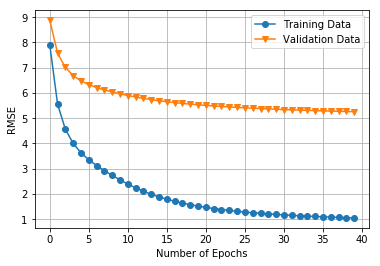

k=20, epochs =80 : 
[7.94654964 5.5861996  4.58766749 4.02510553 3.6535923  3.37748627
 3.15129437 2.95167417 2.76759696 2.59553593 2.43582422 2.28977057
 2.15806579 2.04043974 1.93594317 1.84331096 1.76120608 1.68834617
 1.6235594  1.56580342 1.51416596 1.46785632 1.42619301 1.38859031
 1.35454527 1.32362584 1.29546043 1.26972885 1.24615466 1.22449853
 1.20455278 1.18613669 1.16909254 1.15328234 1.13858496 1.12489381
 1.11211484 1.1001648  1.08896984 1.07846423 1.06858938 1.05929287
 1.05052774 1.04225177 1.03442696 1.02701902 1.01999691 1.01333252
 1.00700032 1.00097707 0.9952416  0.98977455 0.98455825 0.97957645
 0.97481429 0.97025806 0.96589518 0.961714   0.9577038  0.95385464
 0.95015734 0.94660336 0.9431848  0.93989428 0.93672497 0.93367047
 0.93072483 0.9278825  0.92513827 0.92248728 0.91992497 0.91744707
 0.91504957 0.91272869 0.91048091 0.90830288 0.90619146 0.9041437
 0.90215679 0.90022812]


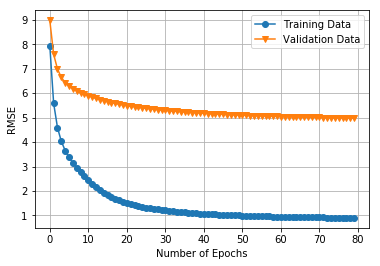

k=20, epochs =120 : 
[8.04400449 5.57801238 4.56548915 3.9990402  3.62291824 3.33825204
 3.0991747  2.88432676 2.68613122 2.50412456 2.33982811 2.19390999
 2.0656173  1.95328968 1.85495324 1.76867622 1.69272272 1.62559586
 1.56603043 1.51296576 1.46551368 1.4229282  1.38457968 1.34993368
 1.31853422 1.28999044 1.26396608 1.24017086 1.21835358 1.19829627
 1.17980937 1.16272766 1.14690677 1.13222027 1.11855713 1.10581964
 1.09392155 1.08278653 1.07234687 1.06254234 1.05331922 1.04462946
 1.03643002 1.0286822  1.02135116 1.01440544 1.00781659 1.00155881
 0.99560864 0.98994476 0.9845477  0.97939967 0.97448439 0.96978695
 0.96529362 0.96099181 0.95686987 0.9529171  0.94912359 0.94548016
 0.94197832 0.9386102  0.93536846 0.9322463  0.92923737 0.92633577
 0.92353598 0.92083284 0.91822153 0.91569754 0.91325664 0.91089485
 0.90860846 0.90639396 0.90424806 0.90216765 0.90014983 0.89819182
 0.89629104 0.89444502 0.89265146 0.89090814 0.889213   0.88756407
 0.88595948 0.88439746 0.88287634 0.88139

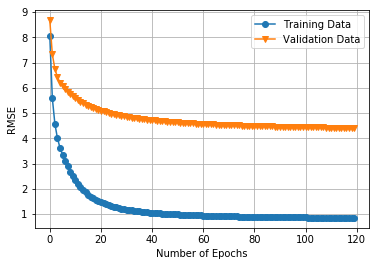

k=20, epochs =160 : 
[8.29976841 5.64036707 4.59668296 4.01712854 3.63181113 3.33837401
 3.09025811 2.86682118 2.66179597 2.47559583 2.30966136 2.16392684
 2.03681241 1.92604314 1.82928282 1.74442398 1.6696675  1.603512
 1.54471382 1.49224264 1.44524142 1.40299301 1.36489339 1.33043044
 1.29916738 1.27072958 1.24479414 1.22108163 1.19934925 1.17938535
 1.16100485 1.14404549 1.12836461 1.11383648 1.10035005 1.087807
 1.07612009 1.06521174 1.05501285 1.04546168 1.03650304 1.0280874
 1.02017031 1.01271174 1.00567561 0.99902932 0.99274334 0.98679094
 0.98114779 0.97579179 0.97070277 0.96586234 0.96125366 0.95686131
 0.95267118 0.94867025 0.94484659 0.94118918 0.93768787 0.93433329
 0.93111675 0.92803022 0.92506625 0.92221792 0.91947881 0.91684293
 0.91430472 0.91185899 0.90950088 0.90722587 0.90502973 0.90290849
 0.90085843 0.89887609 0.89695818 0.89510163 0.89330358 0.89156128
 0.8898722  0.88823393 0.88664418 0.88510081 0.88360181 0.88214526
 0.88072934 0.87935236 0.87801267 0.87670876 0

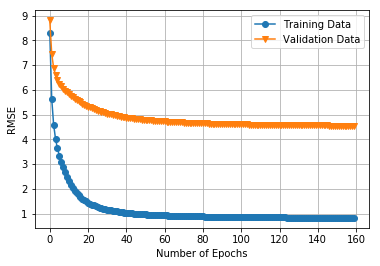

k=20, epochs =200 : 
[8.37607129 5.64269784 4.59754377 4.02559199 3.65135849 3.37097179
 3.13581135 2.92216856 2.72111333 2.53253848 2.35958635 2.2046374
 2.06801688 1.94850502 1.84420069 1.75308945 1.67330074 1.60319179
 1.54135598 1.4866028  1.43792965 1.39449309 1.35558294 1.32059994
 1.28903693 1.26046335 1.23451239 1.21087051 1.18926874 1.16947553
 1.15129088 1.13454146 1.1190765  1.10476446 1.09149021 1.07915263
 1.06766265 1.05694158 1.04691972 1.03753511 1.02873258 1.02046285
 1.01268178 1.00534978 0.9984312  0.99189394 0.98570896 0.97985001
 0.97429324 0.96901699 0.96400155 0.95922892 0.95468267 0.95034775
 0.94621037 0.94225788 0.93847863 0.93486189 0.93139779 0.9280772
 0.92489167 0.92183338 0.9188951  0.91607009 0.91335212 0.91073536
 0.9082144  0.90578419 0.90344002 0.90117748 0.89899247 0.89688111
 0.89483981 0.89286517 0.89095401 0.88910333 0.88731034 0.88557238
 0.88388697 0.88225174 0.8806645  0.87912313 0.87762567 0.87617025
 0.8747551  0.87337853 0.87203898 0.8707349

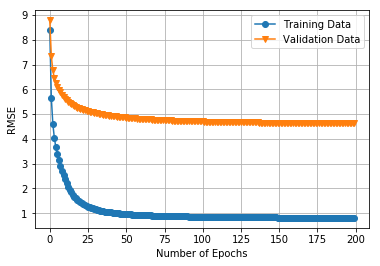

In [11]:
print("k=20, epochs =40 : ")
SGD(user_item,0.001,20,40)#1.0438
print("k=20, epochs =80 : ")
SGD(user_item,0.001,20,80)#0.9383
print("k=20, epochs =120 : ")
SGD(user_item,0.001,20,120)#0.7974
print("k=20, epochs =160 : ")
SGD(user_item,0.001,20,160)#0.6718
print("k=20, epochs =200 : ")
SGD(user_item,0.001,20,200)#0.5680

k=30, epochs =40 : 
[10.93580572  6.45103858  5.06978302  4.3225882   3.82797539  3.45148293
  3.13663361  2.86151181  2.62019466  2.41143965  2.23323036  2.08199206
  1.95355597  1.84398448  1.74990711  1.66856392  1.59773631  1.5356508
  1.48088782  1.4323051   1.38897684  1.35014665  1.31519144  1.28359392
  1.25492146  1.22880981  1.2049504   1.1830803   1.16297435  1.14443881
  1.12730617  1.11143107  1.09668683  1.08296265  1.07016125  1.05819697
  1.04699412  1.03648558  1.02661169  1.01731925]


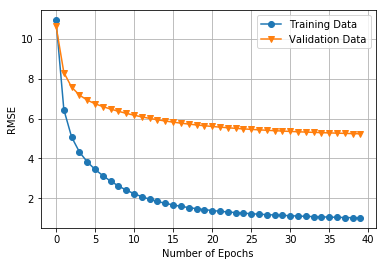

k=30, epochs =80 : 
[9.87815122 6.41718955 5.10355786 4.36863145 3.86938465 3.48003548
 3.15019578 2.86374704 2.61732625 2.40840121 2.23231854 2.08355926
 1.95705251 1.84862452 1.75497126 1.67349866 1.60216168 1.53933365
 1.48370675 1.43421794 1.38999426 1.35031222 1.31456744 1.28225161
 1.25293473 1.22625119 1.20188873 1.17957953 1.159093   1.14022987
 1.12281729 1.10670486 1.0917612  1.07787121 1.06493373 1.05285955
 1.0415698  1.0309945  1.02107143 1.01174508 1.00296583 0.99468919
 0.98687519 0.97948783 0.97249461 0.96586613 0.95957573 0.9535992
 0.94791452 0.9425016  0.93734207 0.93241916 0.92771747 0.92322287
 0.91892237 0.91480401 0.91085676 0.90707043 0.90343559 0.89994352
 0.89658613 0.89335591 0.89024588 0.88724954 0.88436085 0.88157415
 0.87888419 0.87628603 0.87377508 0.87134701 0.86899779 0.86672361
 0.86452093 0.86238639 0.86031684 0.85830933 0.85636105 0.85446937
 0.85263182 0.85084605]


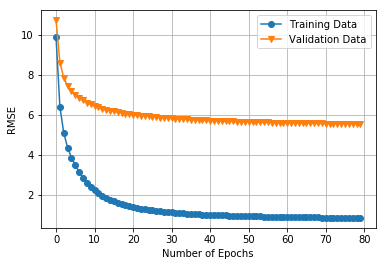

k=30, epochs =120 : 
[10.53083216  6.49392716  5.14350423  4.42003137  3.95592989  3.61750225
  3.34266497  3.10008131  2.8761156   2.66818478  2.47862372  2.30971503
  2.16163669  2.03279237  1.92081345  1.8232656   1.73795708  1.66301759
  1.59688363  1.53825622  1.48605587  1.43938285  1.39748423  1.3597272
  1.32557766  1.29458301  1.26635811  1.24057408  1.21694894  1.19524008
  1.17523801  1.15676116  1.13965164  1.12377165  1.10900052  1.09523223
  1.08237334  1.07034125  1.05906267  1.04847244  1.03851244  1.02913068
  1.02028055  1.01192014  1.0040117   0.99652112  0.98941753  0.98267291
  0.97626182  0.97016107  0.96434949  0.95880774  0.95351811  0.94846435
  0.94363153  0.9390059   0.93457481  0.93032656  0.92625036  0.9223362
  0.91857481  0.91495761  0.91147661  0.90812437  0.90489399  0.90177901
  0.89877342  0.89587159  0.89306828  0.89035856  0.88773782  0.88520175
  0.88274629  0.88036763  0.87806219  0.8758266   0.87365768  0.87155245
  0.86950808  0.86752191  0.8655

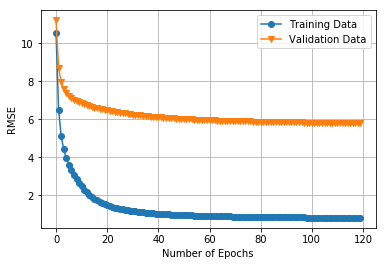

k=30, epochs =160 : 
[11.73252437  6.50878302  5.06481917  4.28329506  3.75958327  3.35858264
  3.02840368  2.74958182  2.51379235  2.31497234  2.14725691  2.00524567
  1.88434265  1.78079012  1.69155632  1.61419937  1.54674734  1.48760116
  1.43545797  1.38925109  1.34810305  1.31128868  1.27820588  1.24835246
  1.22130752  1.19671663  1.17427987  1.15374219  1.13488567  1.11752322
  1.1014935   1.08665677  1.07289146  1.0600914   1.04816352  1.03702595
  1.02660639  1.0168408   1.0076723   0.9990502   0.99092919  0.98326868
  0.97603221  0.96918695  0.96270326  0.95655434  0.95071589  0.94516581
  0.93988403  0.9348522   0.93005358  0.92547285  0.92109595  0.91690997
  0.91290305  0.90906425  0.90538348  0.90185142  0.89845944  0.89519956
  0.89206436  0.88904696  0.88614096  0.8833404   0.88063972  0.87803375
  0.87551764  0.87308686  0.87073718  0.86846462  0.86626548  0.86413624
  0.86207362  0.86007455  0.85813611  0.85625557  0.85443035  0.85265801
  0.85093626  0.84926292  0.84

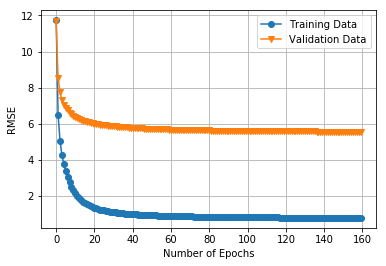

k=30, epochs =200 : 
[11.13820734  6.5578761   5.14755489  4.38823732  3.88836209  3.50908702
  3.19189028  2.91423934  2.67017678  2.45841915  2.27692575  2.1222509
  1.99044138  1.87774218  1.78088468  1.69713989  1.62427566  1.56048271
  1.50429758  1.45453366  1.41022397  1.37057562  1.33493405  1.30275545
  1.27358516  1.2470409   1.22279954  1.20058654  1.18016755  1.16134166
  1.14393583  1.12780044  1.11280558  1.09883802  1.08579871  1.07360066
  1.06216721  1.05143059  1.04133067  1.03181394  1.02283266  1.01434406
  1.00630976  0.99869522  0.99146925  0.98460365  0.97807284  0.97185358
  0.9659247   0.96026686  0.9548624   0.94969512  0.94475016  0.94001384
  0.93547359  0.93111777  0.92693567  0.92291733  0.91905357  0.91533583
  0.91175617  0.90830721  0.90498207  0.90177433  0.898678    0.89568746
  0.89279749  0.89000316  0.88729987  0.8846833   0.88214938  0.8796943
  0.87731446  0.87500648  0.87276716  0.87059349  0.86848262  0.86643188
  0.86443871  0.86250071  0.8606

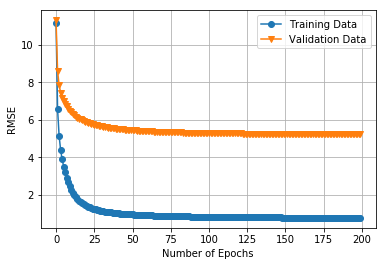

In [12]:
print("k=30, epochs =40 : ")
SGD(user_item,0.001,30,40)#1.0402
print("k=30, epochs =80 : ")
SGD(user_item,0.001,30,80)#0.9357
print("k=30, epochs =120 : ")
SGD(user_item,0.001,30,120)#0.7814
print("k=30, epochs =160 : ")
SGD(user_item,0.001,30,160)#0.6718
print("k=30, epochs =200 : ")
SGD(user_item,0.001,30,200)#0.5715

In [13]:
import scipy.special
import math

def FSGD(z,learning_rate,fractional_learning_rate,epochs,feature,fractional_order): 
    """
    z is a training matrix that has the shape of m*n, m is the number of users and n is the number of items
    learning_rate,
    epochs= # of iterations
    print the cost history over for each iterations
    fractional_order & fractional_learning_rate: unique for FSGD
    """
    m=z.shape[0]
    n=z.shape[1]
    z_train=z[:800]
    z_test=z[800:]
    cost_history=np.zeros(epochs)
    val_errors=[]
    x=5 * np.random.rand(feature,m)#initialize X randomly
    y=5 * np.random.rand(feature,n)#initialize Y randomly
    z_train_array=np.asarray(z_train)
    users,items = np.nonzero(z_train_array)
    print(zip(users,items))
    for epoch in range(epochs):
        error_list=[]
        for u, i in zip(users,items):
            e = z_train.iloc[u, i] - np.dot(x[:,u].T,y[:,i])  # Calculate error for gradient update
            error_list.append(e)
            x[:,u] = x[:,u].astype(float)+learning_rate*(e*y[:,i])+fractional_learning_rate/math.factorial(int(1-fractional_order+0.5))*e*np.multiply(y[:,i],np.power(np.absolute(x[:,u]),(1-fractional_order))) # Update latent user feature matrix
            y[:,i] = y[:,i].astype(float)+learning_rate*e*x[:,u]+fractional_learning_rate/math.factorial(int(1-fractional_order+0.5))*e*np.multiply(x[:,u],np.power(np.absolute(y[:,i]),(1-fractional_order)))
        #RMSE=np.sqrt(np.mean(np.sum(np.square(error_list))))
        train_RMSE=rmse(np.dot(x.T,y),z_train_array)
        test_RMSE = rmse(np.dot(x.T,y),np.asarray(z_test))
        val_errors.append(test_RMSE)
        cost_history[epoch]=train_RMSE
    print(cost_history)
    plt.plot(range(epochs), cost_history, marker='o', label='Training Data');
    plt.plot(range(epochs), val_errors, marker='v', label='Validation Data');
    plt.xlabel('Number of Epochs');
    plt.ylabel('RMSE');
    plt.legend()
    plt.grid()
    plt.show()


k=10, epochs =40, fractional order=0.25 : 
[3.73660085 3.12265641 2.8172392  2.59959889 2.4241477  2.27329309
 2.13776745 2.01278285 1.89655845 1.78894735 1.69045019 1.601451
 1.52195636 1.45166187 1.38993691 1.33596458 1.28888737 1.24786433
 1.2121032  1.18087244 1.15353067 1.12951705 1.1083525  1.08962858
 1.07300127 1.05817531 1.04490447 1.03298177 1.02223102 1.0125012
 1.00366568 0.99561597 0.98825866 0.98151392 0.97531363 0.96959691
 0.96431219 0.95941422 0.95486386 0.95062608]


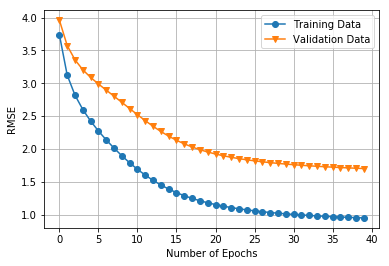

k=10, epochs =80, fractional order=0.25 : 
[3.72125311 3.13694606 2.84035012 2.62353603 2.44292097 2.28250771
 2.13522444 1.99863236 1.87259215 1.75796917 1.65526119 1.56433009
 1.48459705 1.41522304 1.35519085 1.3034085  1.25876312 1.22022835
 1.18688314 1.15792321 1.13266503 1.1105454  1.09108621 1.07389194
 1.05863181 1.04503177 1.03286123 1.02192428 1.01205876 1.00312695
 0.99501278 0.98761565 0.98085078 0.974645   0.96893598 0.96366727
 0.95879217 0.95426954 0.95006342 0.94614218 0.94247795 0.93904643
 0.935826   0.93279748 0.92994383 0.92724982 0.92470186 0.92228765
 0.91999622 0.91781778 0.91574338 0.91376513 0.91187588 0.91006878
 0.90833783 0.90667766 0.90508337 0.90355047 0.90207473 0.90065238
 0.8992798  0.89795392 0.89667181 0.89543075 0.89422826 0.89306204
 0.89192979 0.8908296  0.88975955 0.88871796 0.8877032  0.88671378
 0.88574834 0.88480565 0.8838845  0.88298383 0.88210252 0.88123957
 0.88039399 0.87956499]


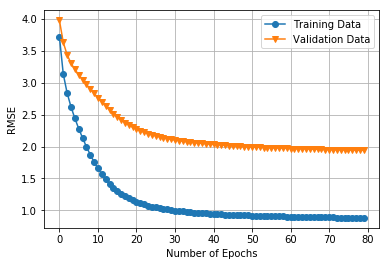

k=10, epochs =120, fractional order=0.25 : 
[3.71930674 3.11601572 2.80765986 2.58077318 2.39101596 2.22252894
 2.0687878  1.9280144  1.8004752  1.68663497 1.58656262 1.49970722
 1.42499964 1.36111545 1.30663447 1.26018934 1.22051298 1.18650544
 1.15722307 1.13187164 1.10979563 1.0904596  1.07342358 1.05833017
 1.04488798 1.03285544 1.02203494 1.01226169 1.0033982  0.99532795
 0.9879532  0.98119141 0.9749704  0.96922958 0.96391653 0.95898626
 0.95439991 0.95012263 0.94612385 0.94237707 0.9388594  0.93554892
 0.93242771 0.92947914 0.92668812 0.9240414  0.92152723 0.91913491
 0.91685501 0.91467893 0.91259858 0.91060672 0.90869689 0.90686302
 0.90509977 0.90340235 0.90176611 0.90018704 0.8986613  0.89718543
 0.89575614 0.89437054 0.89302588 0.89171962 0.89044955 0.88921333
 0.88800916 0.88683515 0.88568959 0.88457083 0.88347738 0.88240787
 0.88136102 0.88033563 0.87933074 0.87834528 0.87737822 0.87642863
 0.87549566 0.87457863 0.87367682 0.87278954 0.87191617 0.87105614
 0.87020879 0.8693

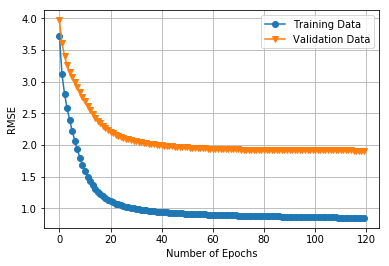

k=10, epochs =160, fractional order=0.25 : 
[3.76280176 3.14537158 2.83858353 2.61340246 2.42189657 2.24759749
 2.08496289 1.93419542 1.79792159 1.67804963 1.57465634 1.48650729
 1.41181842 1.34870146 1.29534223 1.25010492 1.21159063 1.17862152
 1.1502313  1.12563103 1.10418272 1.08537148 1.0687773  1.05406033
 1.04094306 1.02919396 1.01862352 1.00907292 1.00040945 0.9925208
 0.98531243 0.97870486 0.97262965 0.96702716 0.96184648 0.95704329
 0.95257896 0.94841925 0.94453472 0.94089886 0.93748858 0.93428348
 0.93126541 0.92841811 0.92572727 0.92317972 0.92076404 0.91846951
 0.91628653 0.91420663 0.91222233 0.91032658 0.90851271 0.90677479
 0.90510761 0.90350628 0.9019661  0.90048299 0.89905326 0.89767346
 0.89634037 0.89505105 0.89380273 0.89259291 0.89141943 0.89027994
 0.88917244 0.88809517 0.88704637 0.88602445 0.88502792 0.88405528
 0.88310532 0.88217677 0.88126855 0.88037962 0.87950894 0.87865558
 0.87781862 0.8769973  0.87619088 0.87539865 0.87461985 0.87385385
 0.87310013 0.87235

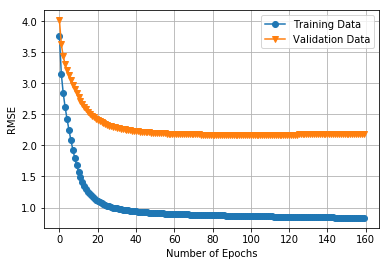

k=10, epochs =200, fractional order=0.25 : 
[3.81145378 3.14170908 2.83217662 2.61279648 2.43370117 2.27854785
 2.13972084 2.01325679 1.89724196 1.79084788 1.69378587 1.60593219
 1.52714996 1.45711461 1.39531949 1.34110445 1.29373525 1.25241648
 1.21637518 1.18491587 1.15739511 1.13324873 1.11199065 1.09320144
 1.07653072 1.06167889 1.04839374 1.03646704 1.02571593 1.01598835
 1.0071533  0.99910081 0.99173572 0.98497838 0.9787594  0.97301977
 0.96770718 0.96277642 0.95818826 0.95390792 0.94990652 0.94615755
 0.9426379  0.9393269  0.93620591 0.93325832 0.93046972 0.92782705
 0.9253183  0.92293297 0.92066177 0.91849602 0.91642783 0.91444995
 0.91255609 0.91074035 0.90899742 0.90732247 0.90571103 0.90415896
 0.90266252 0.90121825 0.89982287 0.89847346 0.8971672  0.89590162
 0.89467433 0.89348323 0.89232633 0.89120169 0.89010756 0.88904228
 0.88800434 0.8869923  0.88600493 0.88504101 0.88409931 0.88317869
 0.88227816 0.88139673 0.88053349 0.87968766 0.87885845 0.87804506
 0.87724672 0.8764

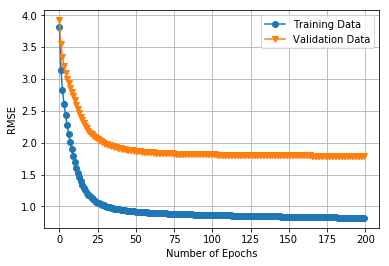

In [14]:
print("k=10, epochs =40, fractional order=0.25 : ")
FSGD(user_item,0.001,0.001,40,10,0.25)#0.0338, better than SGD when k=10 and epochs=40
print("k=10, epochs =80, fractional order=0.25 : ")
FSGD(user_item,0.001,0.001,80,10,0.25)#0.0347
print("k=10, epochs =120, fractional order=0.25 : ")
FSGD(user_item,0.001,0.001,120,10,0.25)#0.0385
print("k=10, epochs =160, fractional order=0.25 : ")
FSGD(user_item,0.001,0.001,160,10,0.25)
print("k=10, epochs =200, fractional order=0.25 : ")
FSGD(user_item,0.001,0.001,200,10,0.25)

k=10, epochs =40, fractional order=0.5 : 
[3.99363225 3.23410264 2.89069398 2.65432258 2.46283037 2.29482557
 2.14225047 2.00317728 1.87726784 1.76472782 1.66526046 1.57798433
 1.50173852 1.43531969 1.3774657  1.32707955 1.28315926 1.24479713
 1.21119232 1.18167124 1.15564851 1.13263171 1.11220686 1.09401417
 1.07774829 1.06315241 1.05001176 1.03814115 1.02737686 1.01758326
 1.00864473 1.00046357 0.99295427 0.9860392  0.97965585 0.97374662
 0.96826456 0.96316224 0.95840327 0.95395526]


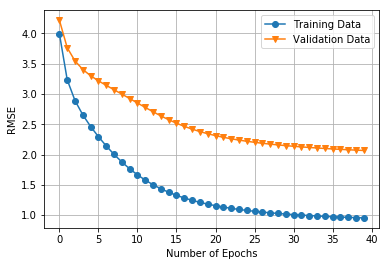

k=10, epochs =80, fractional order=0.5 : 
[3.99694277 3.23272338 2.88469989 2.65039543 2.46814323 2.31501686
 2.18043462 2.0592211  1.94899334 1.84854605 1.7570472  1.6740535
 1.59902076 1.53144811 1.47077815 1.41650534 1.36812015 1.32499563
 1.28654637 1.25228923 1.22172471 1.19441571 1.16997558 1.14804723
 1.12831964 1.1105346  1.09447123 1.07991672 1.06669274 1.05464574
 1.04365261 1.03358872 1.02435546 1.01586316 1.00803773 1.00080769
 0.99411504 0.98790463 0.98212904 0.97674889 0.97172447 0.96702419
 0.96262057 0.95848553 0.95459639 0.95093261 0.94747553 0.94420796
 0.94111428 0.93818128 0.93539601 0.93274688 0.93022343 0.92781752
 0.92551935 0.92332224 0.92121961 0.91920525 0.91727178 0.91541375
 0.9136276  0.91190805 0.91025075 0.90865184 0.90710747 0.90561602
 0.90417271 0.90277526 0.90142057 0.90010679 0.89883171 0.89759437
 0.89638979 0.89521678 0.89407254 0.89295694 0.89186854 0.89080526
 0.88976686 0.88875199]


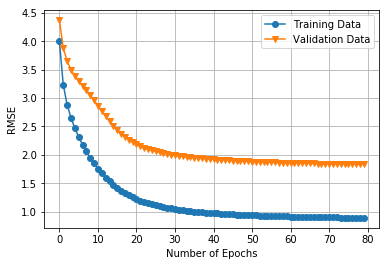

k=10, epochs =120, fractional order=0.5 : 
[3.9596835  3.23502882 2.8911857  2.64750504 2.44538612 2.26534328
 2.1013448  1.95276335 1.82048282 1.70460824 1.6041964  1.51780519
 1.44377595 1.38041015 1.32613017 1.27952649 1.23936052 1.20459347
 1.17437061 1.14799583 1.12485949 1.10447255 1.0864268  1.07038463
 1.05606152 1.04322161 1.03167089 1.02123817 1.01178029 1.00318076
 0.9953371  0.98815787 0.9815689  0.97550438 0.96990703 0.96472787
 0.95992314 0.95545531 0.95129245 0.94740483 0.94376644 0.94035446
 0.93714791 0.93412895 0.93128081 0.92859002 0.92604272 0.92362743
 0.92133408 0.91915347 0.91707587 0.91509445 0.91320202 0.91139219
 0.90965825 0.90799549 0.90639889 0.9048645  0.90338799 0.90196597
 0.90059453 0.89927023 0.89799014 0.89675159 0.89555212 0.89438954
 0.89326158 0.89216589 0.89110087 0.89006499 0.88905635 0.88807359
 0.88711527 0.88618019 0.88526709 0.88437491 0.88350233 0.88264851
 0.88181234 0.88099305 0.88018974 0.87940207 0.87862855 0.87786872
 0.87712269 0.87638

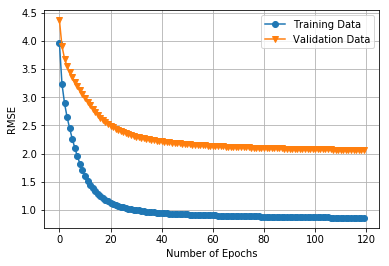

k=10, epochs =160, fractional order=0.5 : 
[4.02434307 3.22007919 2.86702531 2.62786854 2.43710543 2.27123062
 2.12074611 1.98238606 1.85619912 1.74286224 1.6426143  1.55511393
 1.47934019 1.41399095 1.35769147 1.30914726 1.26716856 1.23072422
 1.19895723 1.17113752 1.14667175 1.12505037 1.10586064 1.08875193
 1.07343502 1.05966581 1.0472443  1.03599364 1.02577002 1.01644898
 1.00792768 1.00011431 0.99292876 0.98630354 0.98017848 0.97450426
 0.9692345  0.96432964 0.95975476 0.95547798 0.95147427 0.94771688
 0.94418475 0.94085859 0.93772005 0.93475389 0.9319471  0.92928595
 0.92675938 0.92435774 0.92207221 0.91989363 0.91781484 0.9158286
 0.91392954 0.91211086 0.91036592 0.90869039 0.90708022 0.90553129
 0.90403875 0.90259876 0.90120897 0.89986689 0.89856868 0.89731285
 0.89609655 0.89491661 0.8937696  0.89265471 0.89157081 0.89051631
 0.88948911 0.88848812 0.88751101 0.88655769 0.88562646 0.88471731
 0.88382882 0.88295896 0.88210688 0.88127184 0.88045298 0.87964974
 0.87886158 0.878087

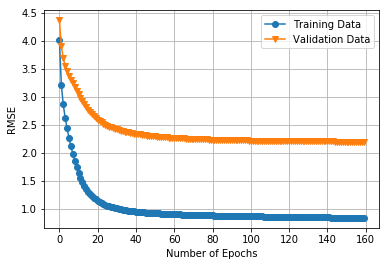

k=10, epochs =200, fractional order=0.5 : 
[3.92240988 3.23486062 2.8968147  2.6563622  2.4564893  2.27655223
 2.10940413 1.95505504 1.81611064 1.69425574 1.58955614 1.5006665
 1.42553209 1.36208187 1.30837724 1.26272881 1.22375965 1.19028893
 1.16137586 1.13624861 1.11428666 1.09498481 1.07793135 1.06278624
 1.04927015 1.03715214 1.02623672 1.01636729 1.00740482 0.99924022
 0.99177613 0.98492997 0.97863336 0.97282324 0.96744902 0.96246022
 0.95782175 0.95349746 0.94945641 0.94567347 0.94212703 0.93879224
 0.93565136 0.93268802 0.9298882  0.92723851 0.92472637 0.9223415
 0.92007387 0.91791455 0.9158557  0.91389001 0.9120107  0.91021243
 0.90848891 0.90683582 0.90524859 0.90372199 0.90225238 0.90083641
 0.89947123 0.89815362 0.8968806  0.89565204 0.89446272 0.89331069
 0.89219375 0.89111046 0.89005887 0.88903724 0.88804386 0.88707761
 0.88613658 0.88521946 0.88432521 0.88345277 0.88260123 0.88176942
 0.88095617 0.88016083 0.87938259 0.87862066 0.87787427 0.87714255
 0.87642484 0.8757204

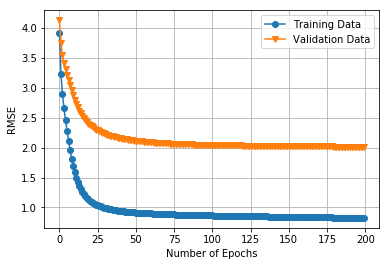

In [15]:
print("k=10, epochs =40, fractional order=0.5 : ")
FSGD(user_item,0.001,0.001,40,10,0.5)
print("k=10, epochs =80, fractional order=0.5 : ")
FSGD(user_item,0.001,0.001,80,10,0.5)
print("k=10, epochs =120, fractional order=0.5 : ")
FSGD(user_item,0.001,0.001,120,10,0.5)
print("k=10, epochs =160, fractional order=0.5 : ")
FSGD(user_item,0.001,0.001,160,10,0.5)
print("k=10, epochs =200, fractional order=0.5 : ")
FSGD(user_item,0.001,0.001,200,10,0.5)

k=10, epochs =40, fractional order=0.75 : 
[4.23535772 3.36099843 2.97068825 2.71679486 2.52281751 2.36019012
 2.21556302 2.08327425 1.96204578 1.85174879 1.75245911 1.66387414
 1.58519715 1.51548246 1.45390596 1.39957527 1.35162513 1.30928566
 1.27187417 1.238706   1.20926792 1.18302952 1.15959594 1.13859867
 1.11972999 1.10274099 1.08740752 1.07349926 1.06085248 1.04933625
 1.03879473 1.02914233 1.02027122 1.01210675 1.00457154 0.99760462
 0.99114948 0.98514932 0.97957158 0.97437029]


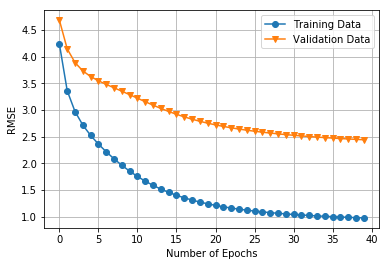

k=10, epochs =80, fractional order=0.75 : 
[4.27659785 3.37011823 2.97586967 2.71915353 2.51896718 2.3456479
 2.18787502 2.0424227  1.9098124  1.79140998 1.68731283 1.59667391
 1.51820062 1.45035884 1.39170395 1.34090728 1.29679298 1.25838063
 1.22479353 1.19527403 1.16922824 1.14611513 1.12555377 1.10718282
 1.0907052  1.07586001 1.06245334 1.05029414 1.03923139 1.02913343
 1.01990111 1.01143049 1.00364399 0.99646635 0.98982861 0.98368048
 0.97796917 0.97266023 0.96770862 0.96308465 0.95876149 0.95470645
 0.95090171 0.94732315 0.94395139 0.94077071 0.93776437 0.93492024
 0.93222511 0.92966895 0.92724118 0.92493006 0.92272918 0.92063032
 0.91862618 0.91670792 0.91487803 0.91312238 0.91144055 0.90982571
 0.90827475 0.90678284 0.90534586 0.90396219 0.90262815 0.90134099
 0.90009647 0.89889427 0.89773178 0.89660599 0.89551492 0.89445734
 0.8934314  0.89243461 0.89146592 0.89052236 0.88960641 0.88871402
 0.88784332 0.88699535]


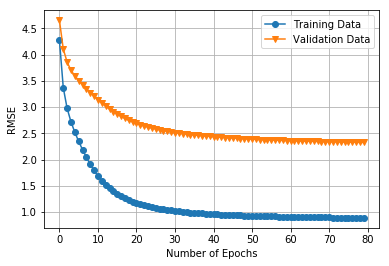

k=10, epochs =120, fractional order=0.75 : 
[4.26044346 3.36615941 2.96923748 2.71133161 2.51334619 2.34526242
 2.19443283 2.05635737 1.93021632 1.81652287 1.7151861  1.62569237
 1.54711349 1.47842208 1.41843281 1.3659971  1.32010462 1.27986166
 1.24450226 1.21336364 1.1858135  1.16137239 1.1395873  1.12012247
 1.10265936 1.08696027 1.07277677 1.05991726 1.04824936 1.03762457
 1.02791904 1.01902714 1.01086392 1.00334977 0.9964167  0.99000204
 0.98406389 0.97854165 0.97340215 0.96860452 0.96411956 0.95992047
 0.95598244 0.95228899 0.94881465 0.94554291 0.94245275 0.9395258
 0.93675888 0.93414042 0.93165399 0.92929134 0.92704062 0.92489735
 0.92285636 0.92090504 0.91903922 0.9172524  0.9155429  0.91390271
 0.91232983 0.91081436 0.90935689 0.90795522 0.90660188 0.90529868
 0.90404094 0.9028257  0.90164997 0.90050987 0.89941014 0.89834502
 0.89731214 0.89630911 0.89533279 0.89438518 0.89346412 0.89256833
 0.89169619 0.8908455  0.89001568 0.88920455 0.88841516 0.88764168
 0.88688514 0.88614

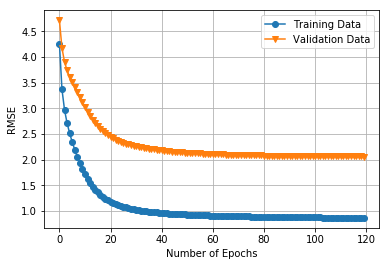

k=10, epochs =160, fractional order=0.75 : 
[4.28298741 3.35488687 2.96400703 2.71660419 2.53133621 2.37784937
 2.2428878  2.12049408 2.0082628  1.90537011 1.81115478 1.7252632
 1.64742202 1.57718931 1.51413177 1.45771244 1.40733251 1.36241893
 1.32240481 1.28673792 1.25491939 1.22649008 1.20103976 1.1781769
 1.15758915 1.13898435 1.12214072 1.10684877 1.09291309 1.08018144
 1.0685199  1.05781381 1.04796079 1.03886206 1.0304456  1.02263917
 1.01538543 1.00862557 1.00231924 0.99642305 0.99090507 0.98572918
 0.98087129 0.97630215 0.9719963  0.96792961 0.96408549 0.96045316
 0.9570111  0.95374451 0.95063758 0.94768061 0.94486403 0.94217957
 0.93961917 0.93717525 0.93483782 0.93260182 0.93045965 0.92840484
 0.92643281 0.92453842 0.92271679 0.92096511 0.91927765 0.91765109
 0.91608216 0.91456748 0.91310379 0.91168818 0.91031919 0.90899399
 0.90771085 0.90646645 0.90525865 0.90408613 0.90294699 0.90183989
 0.90076343 0.89971651 0.89869677 0.89770407 0.89673629 0.89579197
 0.89487059 0.893971

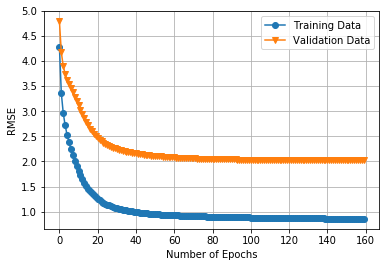

k=10, epochs =200, fractional order=0.75 : 
[4.26455101 3.3468241  2.95186339 2.69581127 2.49868988 2.3310024
 2.17999744 2.04124615 1.91417644 1.79939892 1.69715208 1.6069885
 1.52800751 1.45917863 1.39941558 1.34755438 1.30252468 1.26337729
 1.22924758 1.19937681 1.17312782 1.14994194 1.12936997 1.11103547
 1.09459784 1.07982123 1.06646347 1.05435142 1.04333278 1.03327707
 1.02407212 1.01560997 1.00782328 1.00062199 0.99395943 0.98777952
 0.98202718 0.9766716  0.97167413 0.96699229 0.9626078  0.95848371
 0.95461072 0.95095926 0.94751727 0.94426197 0.94116985 0.93824188
 0.93546681 0.93282639 0.93031193 0.92791385 0.92562484 0.92343143
 0.92133853 0.9193313  0.91741398 0.91557044 0.91380055 0.9120989
 0.91045728 0.90887721 0.90735255 0.90588017 0.90445757 0.90308279
 0.90175273 0.90046285 0.89920992 0.89799363 0.89681342 0.89566567
 0.89454933 0.89346218 0.89240548 0.89137645 0.89037231 0.88939373
 0.88843627 0.88750005 0.88658535 0.88569152 0.88481717 0.88396123
 0.88312126 0.8822993

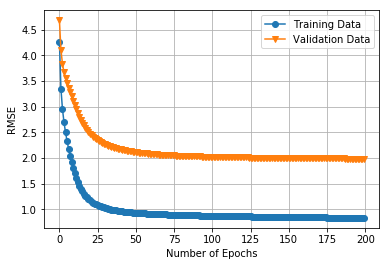

In [16]:
print("k=10, epochs =40, fractional order=0.75 : ")
FSGD(user_item,0.001,0.001,40,10,0.75)
print("k=10, epochs =80, fractional order=0.75 : ")
FSGD(user_item,0.001,0.001,80,10,0.75)
print("k=10, epochs =120, fractional order=0.75 : ")
FSGD(user_item,0.001,0.001,120,10,0.75)
print("k=10, epochs =160, fractional order=0.75 : ")
FSGD(user_item,0.001,0.001,160,10,0.75)
print("k=10, epochs =200, fractional order=0.75 : ")
FSGD(user_item,0.001,0.001,200,10,0.75)

k=20, epochs =40, fractional order=0.25 : 
[4.70019695 3.61306841 3.24167558 2.98891015 2.75782052 2.51791391
 2.27108785 2.03936569 1.84232125 1.68399504 1.55860042 1.45864247
 1.37800856 1.31214001 1.25767298 1.21213751 1.17367271 1.14086824
 1.11264634 1.08817194 1.06679046 1.04798407 1.0313439  1.01653859
 1.00329841 0.99139926 0.98065625 0.97091706 0.96205118 0.9539495
 0.94651911 0.93968018 0.93336497 0.92751567 0.92208196 0.91702099
 0.91229475 0.90786954 0.90371684 0.89981069]


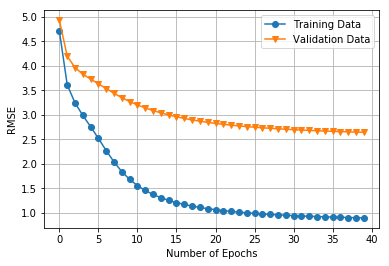

k=20, epochs =80, fractional order=0.25 : 
[4.69676719 3.61296584 3.24394621 2.99313235 2.75878345 2.51096222
 2.25929205 2.03066465 1.8409099  1.68945488 1.56918878 1.47278871
 1.39447523 1.32998087 1.27622284 1.23093508 1.19237816 1.1592399
 1.13052466 1.1054535  1.08341904 1.06393542 1.04660822 1.03111556
 1.01719976 1.00464526 0.99327091 0.98292569 0.97348324 0.96483511
 0.95689037 0.94956872 0.94280143 0.93653047 0.93070427 0.92527843
 0.92021315 0.91547355 0.91102933 0.90685338 0.90292285 0.89921535
 0.89571191 0.89239564 0.88925126 0.88626451 0.88342329 0.88071668
 0.87813446 0.87566773 0.87330785 0.87104757 0.86887955 0.86679749
 0.86479575 0.86286884 0.86101207 0.85922096 0.85749159 0.85582012
 0.85420315 0.85263722 0.85111938 0.84964661 0.84821651 0.84682656
 0.84547453 0.84415829 0.84287599 0.84162582 0.84040607 0.83921517
 0.83805165 0.83691417 0.83580134 0.83471191 0.83364482 0.83259904
 0.8315735  0.83056741]


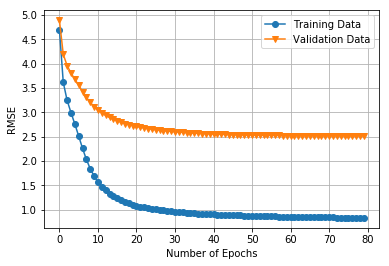

k=20, epochs =120, fractional order=0.25 : 
[4.68332304 3.60124761 3.22830868 2.97539272 2.74561552 2.51268463
 2.28283311 2.07428545 1.89752727 1.75197897 1.63273459 1.53463098
 1.45329237 1.38523957 1.32781948 1.27894605 1.2369958  1.20071107
 1.16909873 1.14138162 1.1169351  1.09525879 1.07593856 1.05863656
 1.04307407 1.02902068 1.01628245 1.00469324 0.99411222 0.98442043
 0.9755165  0.96731149 0.95973035 0.95270474 0.9461792  0.9401017
 0.93442927 0.92912198 0.92414606 0.91947089 0.91506901 0.91091644
 0.90699173 0.90327688 0.89975505 0.89640998 0.89322749 0.89019495
 0.88730134 0.88453595 0.88188961 0.87935386 0.87692079 0.87458338
 0.87233525 0.87017037 0.86808326 0.86606944 0.86412425 0.8622434
 0.86042288 0.85865897 0.8569481  0.85528715 0.85367396 0.85210536
 0.85057893 0.84909234 0.8476432  0.84622959 0.84484991 0.84350189
 0.84218412 0.84089502 0.83963324 0.83839772 0.83718693 0.83599971
 0.83483486 0.83369162 0.83256907 0.83146613 0.83038191 0.82931586
 0.82826716 0.827235

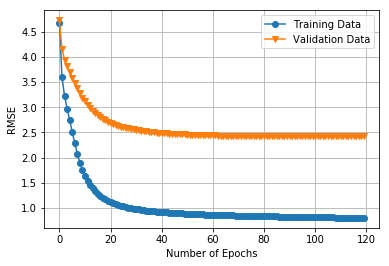

k=20, epochs =160, fractional order=0.25 : 
[4.98791792 3.63315283 3.25034462 2.99675984 2.76506217 2.53044999
 2.30322907 2.10012105 1.92745554 1.78346152 1.66388749 1.56435466
 1.48103612 1.41081978 1.35121754 1.30021748 1.25626828 1.21814177
 1.18485888 1.15562961 1.12981755 1.10690986 1.08648708 1.06820499
 1.05177188 1.03694096 1.02350588 1.01129444 1.00015818 0.98997103
 0.98062249 0.97201938 0.96408008 0.95673518 0.94992266 0.94358891
 0.93768558 0.93217104 0.92700863 0.92216581 0.9176138  0.91332676
 0.90928171 0.90545861 0.90183926 0.898407   0.89514696 0.89204567
 0.8890909  0.88627159 0.88357812 0.88100175 0.8785342  0.87616827
 0.87389678 0.87171352 0.86961263 0.86758878 0.86563708 0.86375301
 0.86193258 0.86017187 0.8584674  0.85681605 0.85521473 0.85366054
 0.85215091 0.85068341 0.84925562 0.8478655  0.84651104 0.84519026
 0.84390148 0.84264319 0.84141389 0.84021214 0.83903657 0.83788586
 0.83675889 0.83565463 0.83457199 0.83350994 0.83246764 0.83144416
 0.83043873 0.8294

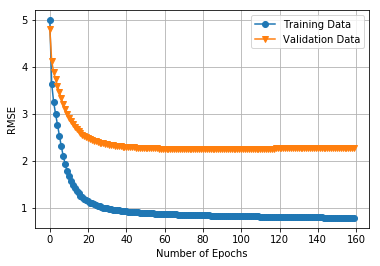

k=20, epochs =200, fractional order=0.25 : 
[4.89357397 3.59688801 3.21119101 2.95855807 2.73290026 2.50406703
 2.27392522 2.05972812 1.8751231  1.72309056 1.59992287 1.50023251
 1.41898741 1.35210104 1.29642421 1.24957314 1.2097391  1.17555059
 1.14594859 1.12011275 1.09739658 1.07729358 1.05939438 1.04336984
 1.02894935 1.01591702 1.00409141 0.99331863 0.98346783 0.97443041
 0.96611382 0.95843748 0.95133266 0.94474101 0.93861065 0.93289654
 0.92755877 0.92256152 0.91787344 0.91346731 0.90931853 0.90540548
 0.90170853 0.89820987 0.89489359 0.89174556 0.888753   0.88590399
 0.88318752 0.88059378 0.8781146  0.87574203 0.87346865 0.87128761
 0.86919261 0.86717843 0.86523975 0.8633717  0.86157014 0.85983088
 0.85815005 0.85652419 0.85495003 0.85342456 0.85194498 0.85050874
 0.84911367 0.84775737 0.84643775 0.84515275 0.84390051 0.84267945
 0.84148795 0.84032456 0.83918761 0.83807598 0.83698849 0.83592398
 0.83488137 0.83385962 0.83285776 0.83187487 0.83091003 0.82996235
 0.8290311  0.8281

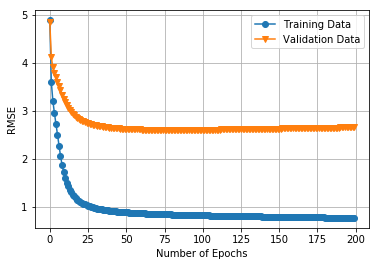

In [17]:
print("k=20, epochs =40, fractional order=0.25 : ")
FSGD(user_item,0.001,0.001,40,20,0.25)
print("k=20, epochs =80, fractional order=0.25 : ")
FSGD(user_item,0.001,0.001,80,20,0.25)
print("k=20, epochs =120, fractional order=0.25 : ")
FSGD(user_item,0.001,0.001,120,20,0.25)
print("k=20, epochs =160, fractional order=0.25 : ")
FSGD(user_item,0.001,0.001,160,20,0.25)
print("k=20, epochs =200, fractional order=0.25 : ")
FSGD(user_item,0.001,0.001,200,20,0.25)